In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re
import random
from sympy import symbols, solve, Eq
import math
from datetime import datetime
from datetime import timedelta

<h1><center> <font color=red>Aodong Weight Loss Progress </center></h1>
    
> #### All data provided by Renpho bluetooth scale. 
> #### Body composition data only available after Day 41 (08/17/2022)
> #### Due to COVID symptoms, training stopped on 10/17/2022 and resumed on 10/20/2022. Data from 10/16/2022-10/19/2022 will be discarded (Screened with df['Remarks'] == 'COVID'). 
> #### Data on days after a rest day is discarded (Screened with df['Remarks'] == 'REST').

### Helper Functions: 

In [303]:
def getBestLineFit(xx, yy, axess, displayEqn):
    x = xx
    y = yy
    a, b = np.polyfit(x, y, 1)
    c = '#c99aff'
    axess.plot(x, a*x+b, color=c, linestyle='--', linewidth=2)
    if(displayEqn):
        axess.text(0.21, 0.97, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', color=c, 
                   size=20, horizontalalignment='center', verticalalignment='center', transform=axess.transAxes)

In [330]:
def labelPoints(interval, x, y, axess):
    a = x.max() - x.min()
    b = y.max() - y.min()
    
    # distance between last interval multiple and last data point
    distToLastPoint = 3
    
    # plot points for interval multiples
    for i in range(a - distToLastPoint +1):
        if(i % interval == 0):
            axess.text(x[i]+0.006*a,y[i]+0.016*b,'Day ' + str(x[i]) + ': ' + '{:.2f}'.format(y[i]))
            
    # label last data point
    axess.text(x[-1]+0.006*a,y[-1]+0.016*b,'Day ' + str(x[-1]) + ': ' + '{:.2f}'.format(y[-1]))

In [316]:
def plotSegment(start, end, axess,c,showDataPoints=True, joinLine = False):
    x = df['Day'][start:end]
    y = df['Weight(lb)'][start:end]
    a, b = np.polyfit(x, y, 1)
    m = 'None' if (not showDataPoints) else 'o'
    l = 'None' if (not joinLine) else 'dotted'
    axess.plot(x, y, color=c, marker=m, ms = 4, linestyle=l)
    axess.plot(x, a*x+b, label='Day' + str(start+1) + '-' + str(end) + ': y='+'{:.4f}'.format(b)+'{:.4f}'.format(a)+'x',linestyle='--',color=c,lw=2)    

In [317]:
def CalculateDaysToAchieveGoal(xx, yy, goal, restDayCount):
    x = xx
    y = yy
    a, b = np.polyfit(x, y, 1)
    
    k = symbols('k')
    eqn_to_solve = Eq(b + a * k, goal)
    sol = math.ceil(solve(eqn_to_solve)[0]) + restDayCount
    
    print('Days needed to achieve the goal of ' + str(goal) + ': ' + str(sol) + ' Days')

    beginDateString = "2022-07-06"
    beginDate = datetime.strptime(beginDateString, "%Y-%m-%d")
    print("Beginning date:")
    print(beginDate)
  
    endDate = beginDate + timedelta(days=int(sol))
    print("Ending date:")
    print(endDate)

***

### Overall Trend

In [324]:
df = pd.read_csv ('/Users/aodongliu/Random/weightloss/data/renpho_data_10312022.csv')
df = df[::-1]

In [325]:
df[ (df['Remarks'] == 'REST') | (df['Remarks'] == 'COVID') ]

,Time of Measurement,Weight(lb),BMI,Body Fat(%),Fat-free Body Weight(lb),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(lb),Bone Mass(lb),Protein(%),BMR(kcal),Metabolic Age,Remarks,Day,DayFull
15,"10/16/2022, 12:34:42",239.4,30.7,17.8,197,14.3,13,59.4,53.1,187.2,9.8,18.8,2299,27,COVID,0,102
14,"10/17/2022, 11:51:00",238.4,30.6,17.6,196.2,14.2,13,59.5,53.2,186.6,9.8,18.8,2292,27,COVID,0,103
13,"10/18/2022, 09:29:42",237.4,30.5,17.6,195.8,14.1,13,59.5,53.3,186,9.8,18.8,2287,27,COVID,0,104
12,"10/19/2022, 10:47:17",237.0,30.4,17.5,195.4,14.1,13,59.5,53.3,185.6,9.8,18.8,2284,27,COVID,0,105
4,"10/27/2022, 09:00:08",229.4,29.5,16.8,191,13.6,12,60.1,53.8,181.4,9.6,19,2241,26,REST,0,113


In [326]:
restDayCount = len( df[ (df['Remarks'] == 'REST') | (df['Remarks'] == 'COVID') ] )
# Remove data during COVID recovery
df = df[ (df['Remarks'] != 'REST') & (df['Remarks'] != 'COVID') ]
pd.set_option('display.max_rows', None)
df

,Time of Measurement,Weight(lb),BMI,Body Fat(%),Fat-free Body Weight(lb),Subcutaneous Fat(%),Visceral Fat,Body Water(%),Skeletal Muscle(%),Muscle Mass(lb),Bone Mass(lb),Protein(%),BMR(kcal),Metabolic Age,Remarks,Day,DayFull
116,"07/06/2022, 07:30:00",324.8,41.7,--,--,--,--,--,--,--,--,--,--,--,--,1,1
115,"07/07/2022, 07:53:50",322.6,41.4,--,--,--,--,--,--,--,--,--,--,--,--,2,2
114,"07/08/2022, 07:43:33",322.0,41.3,--,--,--,--,--,--,--,--,--,--,--,--,3,3
113,"07/09/2022, 11:03:08",323.0,41.4,--,--,--,--,--,--,--,--,--,--,--,--,4,4
112,"07/10/2022, 13:17:02",321.4,41.3,--,--,--,--,--,--,--,--,--,--,--,--,5,5
111,"07/11/2022, 07:24:57",322.8,41.4,--,--,--,--,--,--,--,--,--,--,--,--,6,6
110,"07/14/2022, 09:29:34",319.4,41.0,--,--,--,--,--,--,--,--,--,--,--,--,7,7
109,"07/15/2022, 08:10:59",318.8,40.9,--,--,--,--,--,--,--,--,--,--,--,--,8,8
108,"07/16/2022, 10:41:55",317.2,40.7,--,--,--,--,--,--,--,--,--,--,--,--,9,9
107,"07/17/2022, 09:36:07",320.2,41.1,--,--,--,--,--,--,--,--,--,--,--,--,10,10


In [327]:
# Extract body composition data from dataframe since they are only available after day 41
daysAfter40 = df['Day'][40:]
bodyFatData =  np.array([float(i) for i in df['Body Fat(%)'][40:]])
visceralFatData =  np.array([float(i) for i in df['Visceral Fat'][40:]])

# Set y-tick spacing
weight_interval = 15
BMI_interval = 2
bodyFact_interval = 1

# Whether to show best line fit equation on the graph
displayEqn = True

# Whether to label datapoints every user-defined interval
labelProgress = True

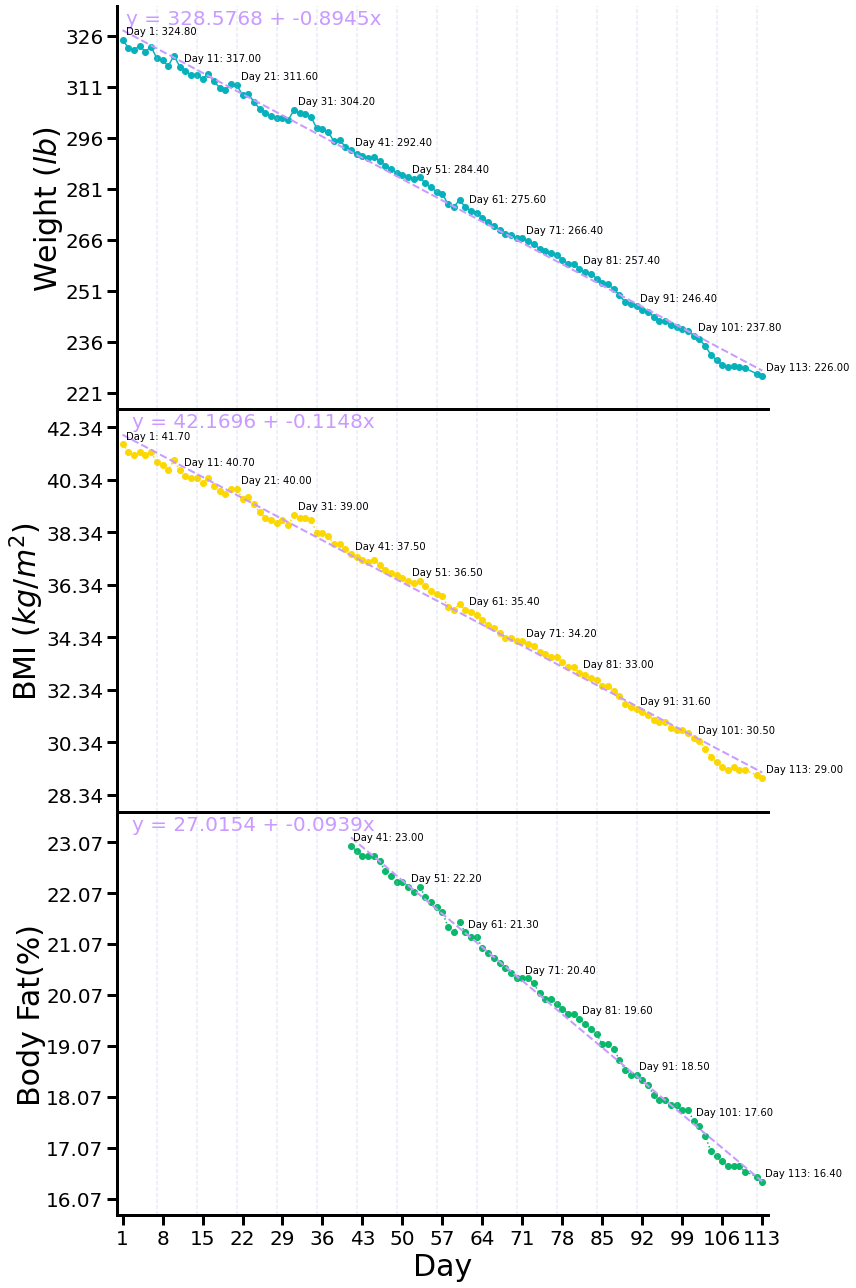

In [328]:
fig, ax = plt.subplots(3, 1,figsize =(12, 18), sharex=True, sharey='row', gridspec_kw={'hspace': 0},tight_layout=True)


ax[0].plot(df['Day'], df['Weight(lb)'], marker='o', linestyle = '-', color ='#07b1bc',  label ='Weight')
ax[0].set_ylim(df['Weight(lb)'].min()-0.66*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval)
ax[0].set_yticks(np.arange(df['Weight(lb)'].min()-0.33*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval,weight_interval))
ax[0].set_ylabel('Weight ($lb$)',fontsize=30,labelpad = 0.4) 
getBestLineFit(df['Day'], df['Weight(lb)'], ax[0], displayEqn)
if (labelProgress): labelPoints(10, np.array(list(df['Day'])),np.array(list(df['Weight(lb)'])), ax[0])
    

ax[1].plot(df['Day'], df['BMI'], marker='o', linestyle = ':', color ='#fdd800')
ax[1].set_ylim(df['BMI'].min()-0.66*BMI_interval,df['BMI'].max()+0.66*BMI_interval)
ax[1].set_yticks(np.arange(df['BMI'].min()-0.33*BMI_interval,df['BMI'].max()+0.66*BMI_interval,BMI_interval))
ax[1].set_ylabel('BMI ($kg/m^2$)',fontsize=30,labelpad = 0.4)
getBestLineFit(df['Day'], df['BMI'], ax[1], displayEqn)
if (labelProgress): labelPoints(10, np.array(list(df['Day'])),np.array(list(df['BMI'])), ax[1])
    
    
ax[2].plot(daysAfter40, bodyFatData, marker='o', linestyle = ':', color ='#0ab86b')
ax[2].set_ylim(bodyFatData.min()-0.66*bodyFact_interval, bodyFatData.max()+0.66*bodyFact_interval)
ax[2].set_yticks(np.arange(bodyFatData.min()-0.33*bodyFact_interval,bodyFatData.max()+0.66*bodyFact_interval,bodyFact_interval))
ax[2].set_ylabel('Body Fat(%)',fontsize=30,labelpad = 0.4)
getBestLineFit(daysAfter40, bodyFatData, ax[2], displayEqn)
if (labelProgress): labelPoints(10, np.array(list(daysAfter40)), np.array(list(bodyFatData)), ax[2])

    
ax[2].tick_params(axis='x', labelsize=20)
ax[2].set_xlim(0,df['Day'].max()+1)
ax[2].set_xticks(np.arange(1, df['Day'].max()+1,7))


ax[0].spines['top'].set_visible(False)
ax[1].spines["top"].set_linewidth(3)
ax[2].spines["top"].set_linewidth(3)

for i in range(3):
    ax[i].spines["left"].set_linewidth(3)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines["bottom"].set_linewidth(3)
    
    ax[i].tick_params(axis='y', labelsize=20)
    
    ax[i].tick_params(direction='out', axis ='y', which ='both', length=10, width=3)
    ax[i].tick_params(direction='out', axis ='x', which ='both', length=10, width=3)
    
    # Add vertical lines in between each week to help visualize progress
    for j in np.arange(0, df['Day'].max()+1,7):
        ax[i].axvline(x=j,linewidth=0.4, color='#a7b9d7', linestyle=(0, (10, 5)))
             
plt.xlabel("Day",fontsize=30)
plt.savefig('/Users/aodongliu/Random/weightloss/plots/10312022.pdf',dpi=3600,bbox_inches="tight")
plt.show()


***

### Segmented Trend 

In [242]:
# divide all data into groups to monitor the change in weight loss trend
day_interval = 10

nums_segments = df['Day'].size // day_interval

hexadecimal_alphabets = '0123456789ABCDEF'

# randomly create different colors to differentiate different segments
colors = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(nums_segments+1)]

# whether to show data points on the graph
showDataPoints = True

# whether to connect the data points
joinLine = False

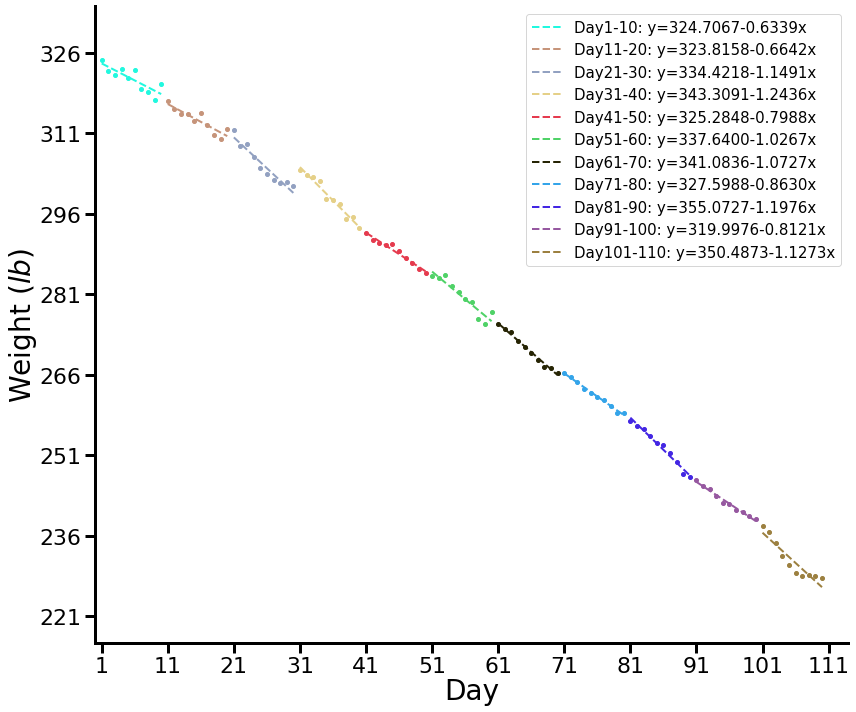

In [243]:
fig, ax1 = plt.subplots(1,1, figsize=(12,10), tight_layout=True)

# plot weight trend for every user-specified inteval 
for i in range(nums_segments):
    nexti = (i+1)* day_interval
    plotSegment(i*day_interval,nexti,ax1,colors[i], showDataPoints, joinLine )

# if we have more than 3 leftover data points, plot them on the graph as the final segment
if(df['Day'].size - nums_segments*day_interval > 3): plotSegment(nums_segments*day_interval, df['Day'].size+1, ax1, colors[-1], showDataPoints, joinLine)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines["left"].set_linewidth(3)
ax1.spines["bottom"].set_linewidth(3)

ax1.set_ylim(df['Weight(lb)'].min()-0.66*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval)
ax1.set_yticks(np.arange(df['Weight(lb)'].min()-0.33*weight_interval,df['Weight(lb)'].max()+0.66*weight_interval,weight_interval))
ax1.set_ylabel('Weight ($lb$)',fontsize=28,labelpad = 0.4)

ax1.set_xlim(0,df['Day'].max()+1)
ax1.set_xticks(np.arange(1, df['Day'].max()+1,day_interval))
ax1.set_xlabel('Day',fontsize=28,labelpad = 0.4)

ax1.tick_params(direction='out', axis ='y', which ='both', length=10, width=3,labelsize=22)
ax1.tick_params(direction='out', axis ='x', which ='both', length=10, width=3,labelsize=22)

plt.legend(fontsize=15)

plt.tight_layout()
plt.savefig('/Users/aodongliu/Random/weightloss/plots/segmented_trend.pdf',dpi=3600,bbox_inches="tight")
plt.show()


***

### Date/Goal Calculator

### Not Fat Level (BMI <= 30):

In [244]:
weight_goal = 2.206 * 1.88 * 1.88 * 30
CalculateDaysToAchieveGoal(df['Day'], df['Weight(lb)'], weight_goal, restDayCount)

Days needed to achieve the goal of 233.90659199999993: 111 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-25 00:00:00


In [245]:
bmi_goal = 30
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 30: 111 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-25 00:00:00


In [246]:
bodyFat_goal = 17
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 17: 112 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-10-26 00:00:00


In [247]:
visceralFat_goal = 11
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 11: 123 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-06 00:00:00


### Minimum Level:

In [248]:
weight_goal = 220
CalculateDaysToAchieveGoal(df['Day'][60:], df['Weight(lb)'][60:], weight_goal, restDayCount)

Days needed to achieve the goal of 220: 124 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-07 00:00:00


In [249]:
bmi_goal = 28
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 28: 129 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-12 00:00:00


In [250]:
bodyFat_goal = 15
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 15: 133 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-16 00:00:00


In [251]:
visceralFat_goal = 9
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 9: 141 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-24 00:00:00


### Ideal Level:

In [252]:
weight_goal = 205
CalculateDaysToAchieveGoal(df['Day'], df['Weight(lb)'], weight_goal, restDayCount)

Days needed to achieve the goal of 205: 144 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-11-27 00:00:00


In [253]:
bmi_goal = 25
CalculateDaysToAchieveGoal(df['Day'], df['BMI'], bmi_goal, restDayCount)

Days needed to achieve the goal of 25: 155 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-08 00:00:00


In [254]:
bodyFat_goal = 13
CalculateDaysToAchieveGoal(daysAfter40, bodyFatData, bodyFat_goal, restDayCount)

Days needed to achieve the goal of 13: 155 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-08 00:00:00


In [255]:
visceralFat_goal = 6
CalculateDaysToAchieveGoal(daysAfter40, visceralFatData, visceralFat_goal, restDayCount)

Days needed to achieve the goal of 6: 168 Days
Beginning date:
2022-07-06 00:00:00
Ending date:
2022-12-21 00:00:00
